In [1]:
!pip install numpy matplotlib scikit-image

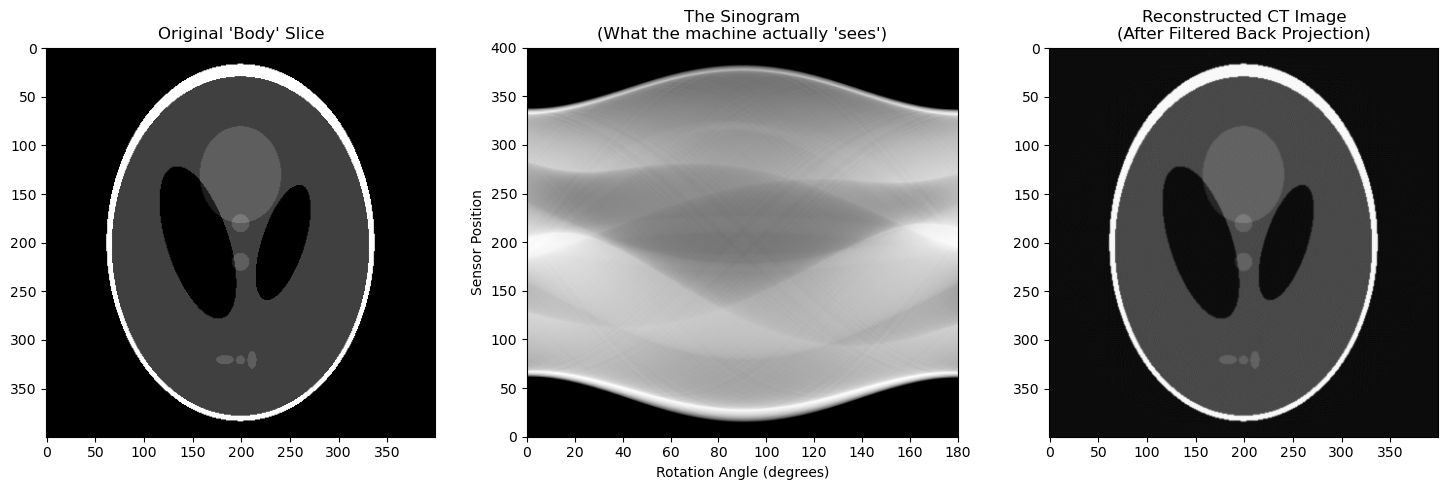

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon
from skimage.data import shepp_logan_phantom

# 1. Create the "Phantom" (A standard test image for medical imaging)
# This represents a simplified cross-section of a human head
image = shepp_logan_phantom()

# 2. Simulate the CT Scan (Forward Projection / Radon Transform)
# We take 'snapshots' at every 1 degree for 180 degrees
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)

# 3. Reconstruct the Image (Inverse Radon Transform)
# We use 'Filtered Back Projection' (FBP), the classic CT algorithm
reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')

# 4. Visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_title("Original 'Body' Slice")
ax1.imshow(image, cmap=plt.cm.Greys_r)

ax2.set_title("The Sinogram\n(What the machine actually 'sees')")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r, extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')
ax2.set_xlabel("Rotation Angle (degrees)")
ax2.set_ylabel("Sensor Position")

ax3.set_title("Reconstructed CT Image\n(After Filtered Back Projection)")
ax3.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)

plt.tight_layout()
plt.show()